In [3]:
import numpy as np
import scipy.io as sio
import h5py
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

In [4]:
data_path = Path('../data')

In [5]:
fnames = [f for f in os.listdir(data_path) if f.endswith('.mat')]
data = {}
for fname in fnames:
    d_name = fname.split('.')[0]
    print(f'loading {d_name}')
    try:
        data[d_name] = h5py.File(data_path / fname, 'r')
    except OSError:
        data[d_name] = sio.loadmat(data_path / fname)

loading RGB_19_2_wet
loading TDWB_19_2_chanMaps
loading TDWB_19_2_SLOPE
loading TDB_17_data
loading ZD_19_2_wet
loading TDB_13_data


In [6]:
data['TDB_17_data'].keys()

dict_keys(['__header__', '__version__', '__globals__', 'B_maps', 'C_maps', 'G_maps', 'R_maps', 'Z_maps'])

In [7]:
data['TDB_17_data']['B_maps'].shape

(796, 522, 560)

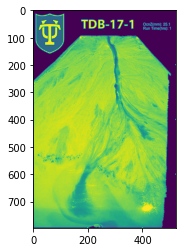

In [8]:
plt.imshow(data['TDB_17_data']['G_maps'][:, :, 0])

In [10]:
n_images = 560

In [21]:
for i in range(7):
    istart, iend = i*100, (i+1)*100
    iend = min(n_images, iend)
    idx = data['TDB_17_data']['Z_maps'][:, :, istart:iend] == 0
    tbd_17 = []
    for col in ['R_maps', 'G_maps', 'B_maps']:
        dcopy = data['TDB_17_data'][col][:, :, istart:iend].copy()
        dcopy[idx] = 0
        tbd_17.append(dcopy)

    tbd_17.append(data['TDB_17_data']['Z_maps'][:, :, istart:iend])
    tbd_17.append(data['TDB_17_data']['C_maps'][:, :, istart:iend])
    tbd_17_array = np.array(tbd_17)
    tbd_17_array = np.moveaxis(tbd_17_array, -1, 0)
    tbd_17_array = np.moveaxis(tbd_17_array, 1, -1)
    np.save(f'tbd_17_part_{i}.npy', tbd_17_array)

## data processing to do:

- Tulane data needs to rid of out of bound pixels (some contains logo and metadata needs to be painted over) (not if we just use the whole image as training/target)
- size of image gonna matter, the context of a local vs big picture can be quite different, especially consideringd the masks are a subset of all channels
- we probably have to split image to enrich the dataset. We will see.

In [26]:
rgb_19_2_wet = data['RGB_19_2_wet']['RGB_19_2_wet']

In [27]:
rgb_19_2_wet.shape

(3, 560, 747, 750)

In [28]:
rgb_19_2_wet

<HDF5 dataset "RGB_19_2_wet": shape (3, 560, 747, 750), type "<f8">

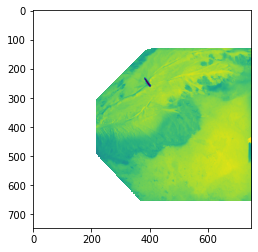

In [31]:
plt.imshow(rgb_19_2_wet[1, 0, :, :])

In [32]:
data['TDWB_19_2_chanMaps']['TDWB_19_2_chanMaps'].shape

(560, 747, 750)

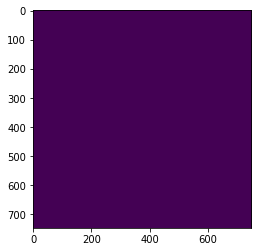

In [33]:
plt.imshow(data['TDWB_19_2_chanMaps']['TDWB_19_2_chanMaps'][100, :, :])

(array([     0.,      0.,      0.,      0.,      0., 560250.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

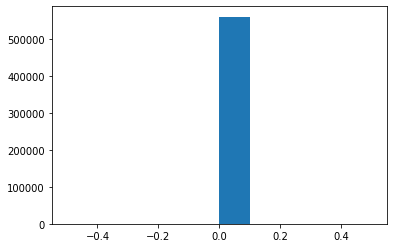

In [35]:
plt.hist(data['TDWB_19_2_chanMaps']['TDWB_19_2_chanMaps'][100, :, :].ravel())